# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

churn_data_frame = pd.read_csv("..\..\Data\orange_small_churn_data.train", ",")
churn_labels_frame = pd.read_csv("..\..\Data\orange_small_churn_labels.train", header=None)
churn_data_frame.shape

(40000, 230)

In [2]:
churn_labels_frame.shape

(40000, 1)

2\. Рассчитайте доли классов `отток` и `не отток`.

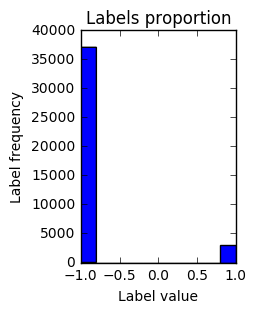

In [3]:
proportion_plot = churn_labels_frame.plot(kind="hist", title="Labels proportion", figsize=(2,3), legend=False)
proportion_plot.set_xlabel("Label value")
proportion_plot.set_ylabel("Label frequency")

In [4]:
not_churn_proportion = float(churn_labels_frame[churn_labels_frame[0] == -1].shape[0])/float(churn_labels_frame.shape[0])
churn_proportion = float(churn_labels_frame[churn_labels_frame[0] == 1].shape[0])/float(churn_labels_frame.shape[0])
print ("Доля ответов класса \"отток\": %.4f%%\nДоля ответов класса \"не отток\": %.4f%%" % (churn_proportion, not_churn_proportion))

Доля ответов класса "отток": 0.0744%
Доля ответов класса "не отток": 0.9256%


**По долям ответов класса "отток" и "не отток" видно, что выборка сильно перекошена и наблюдений класса "отток" существенно меньше.**

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles

**Поскольку признаки и целевая функция имеют разные типы (численный или категориальный для признаков и бинарный для ответов). Поэтому корреляции Пирсона и Спирмена применять нельзя. Можно посчитать меру силы взаимосвязи по формуле**
$$E(X1 |X2 = 1)−E(X1 |X2 = 0)$$
**Матожидание в выборке приблизим средним, тогда получим**
$$\frac{\sum_{i=1}^n{{(x_{i}|y_{i}=1)}}}{k} - \frac{\sum_{i=1}^n{{(x_{i}|y_{i}=-1)}}}{\ell}$$
где $k$ - количество наблюдений с $y=1$, а $\ell$ - количество наблюдений с $y=-1$

**Можно взять от полученных значений модуль, т.к. большое отрицательное значение будет характеризовать обратную взаимосвязь и отсортировать значения по убыванию**

In [9]:
# Выбрать все колонки с нестроковыми значениями, нормализовать их значения, затем только считать корреляции
full_frame = churn_data_frame.copy()
full_frame["Label"] = churn_labels_frame[0]
full_frame_mtx = full_frame.as_matrix()
scaler = StandardScaler()
full_frame_mtx = scaler.fit_transform(full_frame_mtx)
full_frame_mtx

ValueError: could not convert string to float: 'am7c'

In [60]:

churn_means = full_frame[full_frame["Label"] == 1].mean(axis=0)
not_churn_means = full_frame[full_frame["Label"] == -1].mean(axis=0)
interrelations = (churn_means - not_churn_means).abs().sort_values(ascending=False)[:20]
interrelations

Var131    1.034608e+07
Var69     4.808584e+05
Var53     4.389077e+05
Var177    4.017487e+05
Var180    3.201630e+05
Var114    2.416347e+05
Var111    1.931651e+05
Var113    1.628422e+05
Var153    1.514534e+05
Var154    1.417316e+05
Var59     1.306361e+05
Var124    1.220040e+05
Var10     1.017569e+05
Var33     9.808497e+04
Var139    9.586470e+04
Var38     7.767100e+04
Var5      6.694987e+04
Var182    6.161478e+04
Var36     5.799337e+04
Var92     5.758846e+04
dtype: float64

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [68]:
sns.pairplot(churn_data_frame[list(interrelations.index)])

IndexError: arrays used as indices must be of integer (or boolean) type

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?